<h1>Histogram</h1>

Histogram of a Grayscale image

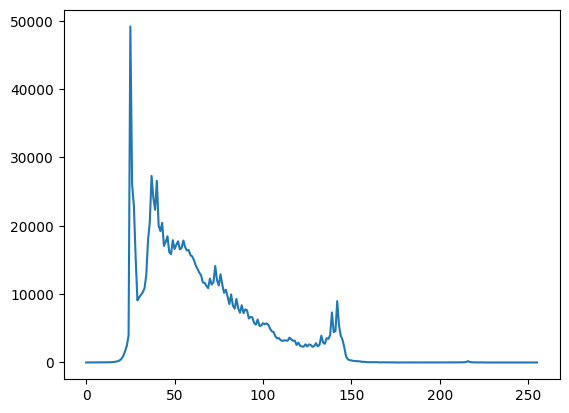

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('Sun.jpeg', cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

Histogram of a Color image

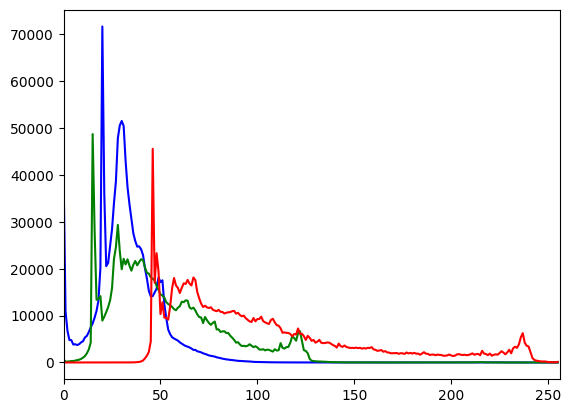

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
img = cv.imread('Sun.jpeg', cv.IMREAD_COLOR)
color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c)
    plt.xlim([0, 256])
plt.show() 

Histogram Equalization

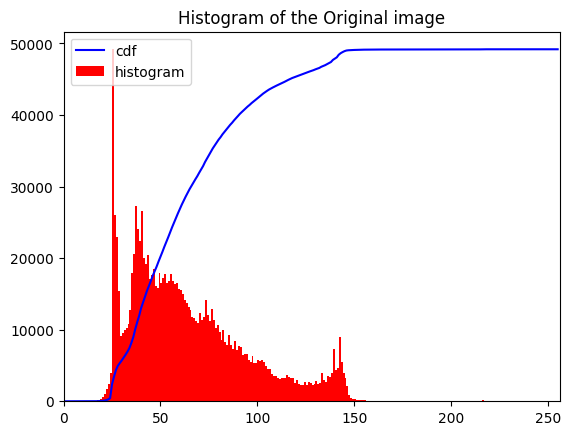

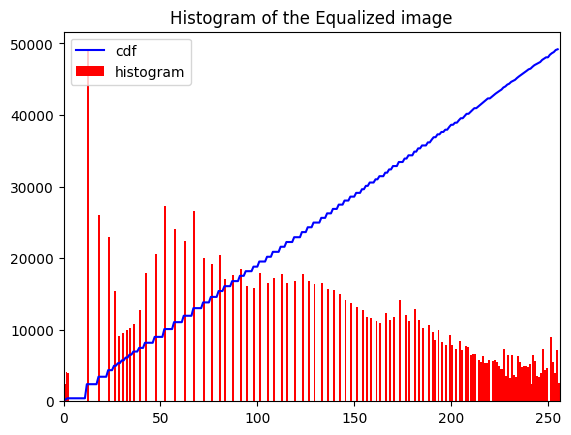

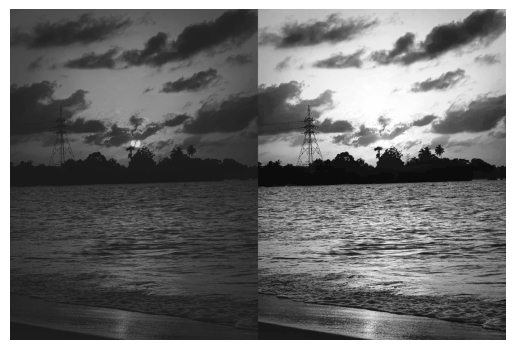

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Sun.jpeg', cv.IMREAD_GRAYSCALE)
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Original image')
plt.show()

equ = cv.equalizeHist(img)
hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
cdf =  hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized image')
plt.show()

res = np.hstack((img, equ))
plt.axis('off')
plt.imshow(res, cmap='gray')


<h1>Gamma Correction</h1>

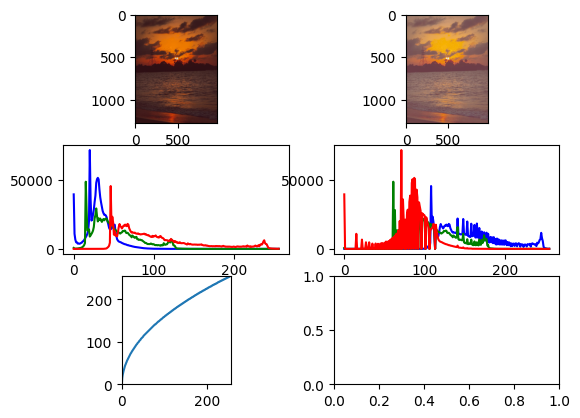

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
img_org = cv.imread('Sun.jpeg', cv.IMREAD_COLOR)
gamma = 0.5
table = np.array([(i / 255.0) ** (gamma)* 255.0 for i in np.arange(0, 256)]).astype("uint8")
img_gamma = cv.LUT(img_org, table)
img_orig = cv.cvtColor(img_org, cv.COLOR_BGR2RGB)
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_BGR2RGB)
f, axarr = plt.subplots(3,2)
axarr[0,0].imshow(img_orig)
axarr[0,1].imshow(img_gamma)
color = ('b','g','r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_org], [i], None, [256], [0,256])
    axarr[1,0].plot(hist_orig, color = c)
    hist_gamma = cv.calcHist([img_gamma], [i], None, [256], [0,256])
    axarr[1,1].plot(hist_gamma, color = c)
axarr[2,0].plot(table)
axarr[2,0].set_xlim([0,256])
axarr[2,0].set_ylim([0,256])
axarr[2,0].set_aspect('equal')